<h4 style="color:tomato"> Author : Pramil Paudel  <br> <br>
 In Partial fullfillment of "Introduction to data science </h4>

Importing required packages. The required packages can be written in the cell itself but I like them to be at the top of the project file. I am code driven but we can write anywhere locally in notebook.

In [328]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import scatter_matrix
from IPython.display import Image
import pydotplus
print("Loading required packages !!! ")      

Loading required packages !!! 


<p style='color : tomato'>I have separated sklearn packages, its beacuse these packages often provide Classifier, Regression, Clustering model we use in the code. A fact is some of the packages are never used in the project but packages are still there, we can optimize import too</p>

In [329]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn import metrics  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn import preprocessing  # Import scikit-learn metrics module pipfor accuracy calculation
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

<h4 style = "color : cyan">  DATA LOADING INTO A PANDA DF </h4>


Lets read the data from each of the file and try to get more information as much as possible. This code cell is reading data from each of the file and displaying the header information along with 2 lines of data. Only two lines of the code are printed as our intension is to look around the data pattern only. This has to be crossed checked if data contains any null values or not. How enconding can be done for string attributes. 

The soccer data needs be more understood before we can find a feature attributs. 

In [330]:
## Loading all data in four different pandas dataframe 
## Printing the data 
PROJECT_ROOT_DORECTORY = '~/Documents/FALL_2020/INTRO_DATASCIENCE/WEEKLY_PROJECT/week_four'
soccer_df = pd.read_csv(PROJECT_ROOT_DORECTORY+"/data/spi_matches_latest.csv")
print("Movies data loaded in ................ spi_matches_latest")
soccer_df.describe()

Movies data loaded in ................ spi_matches_latest


,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,10930.000000,10930.000000,10930.000000,10930.000000,10930.000000,10930.000000,10930.000000,10930.000000,10930.000000,3700.000000,3700.00000,3626.000000,3626.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000,1855.000000
mean,2019.852425,2213.011985,42.836982,42.759296,0.434411,0.312773,0.252816,1.493599,1.208403,32.043811,31.28327,1.493933,1.222284,1.501774,1.215951,1.385865,1.151321,1.510302,1.252744
std,0.354695,972.652985,19.042758,19.077987,0.150176,0.138037,0.043289,0.397007,0.391319,25.894931,25.50237,1.287003,1.149853,0.826538,0.779593,0.646010,0.565801,1.244272,1.151765
min,2019.000000,1818.000000,4.320000,4.230000,0.044200,0.009500,0.000000,0.440000,0.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000
25%,2020.000000,1854.000000,29.050000,28.980000,0.338100,0.223525,0.237200,1.240000,0.960000,13.900000,13.20000,1.000000,0.000000,0.870000,0.650000,0.930000,0.750000,1.050000,0.000000
50%,2020.000000,1882.000000,40.520000,40.470000,0.425500,0.297950,0.261200,1.430000,1.160000,26.200000,25.50000,1.000000,1.000000,1.380000,1.060000,1.290000,1.050000,1.050000,1.050000
75%,2020.000000,2411.000000,55.940000,55.900000,0.517675,0.388700,0.279600,1.680000,1.400000,43.700000,42.32500,2.000000,2.000000,1.990000,1.610000,1.735000,1.475000,2.100000,2.100000
max,2020.000000,9541.000000,95.590000,95.510000,0.944400,0.861500,0.407000,4.000000,3.530000,100.000000,100.00000,9.000000,9.000000,5.970000,5.610000,5.720000,3.830000,8.090000,7.230000


In [331]:
soccer_df.head(10).style.background_gradient(subset=['score1','score2'], cmap='BuGn')

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2019,2019-03-01,1979,Chinese Super League,Shandong Luneng,Guizhou Renhe,48.220000,37.830000,0.575500,0.174000,0.250500,1.750000,0.840000,45.900000,22.100000,1.000000,0.000000,1.390000,0.260000,2.050000,0.540000,1.050000,0.000000
1,2019,2019-03-01,1979,Chinese Super League,Shanghai Greenland,Shanghai SIPG,39.810000,60.080000,0.238700,0.520300,0.241000,1.220000,1.890000,25.600000,63.400000,0.000000,4.000000,0.570000,2.760000,0.800000,1.500000,0.000000,3.260000
2,2019,2019-03-01,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Quanujian,65.590000,39.990000,0.783200,0.067300,0.149500,2.580000,0.620000,77.100000,28.800000,3.000000,0.000000,0.490000,0.450000,1.050000,0.750000,3.150000,0.000000
3,2019,2019-03-01,1979,Chinese Super League,Wuhan Zall,Beijing Guoan,32.250000,54.820000,0.227600,0.522600,0.249800,1.100000,1.790000,35.800000,58.900000,0.000000,1.000000,1.120000,0.970000,1.510000,0.940000,0.000000,1.050000
4,2019,2019-03-01,1979,Chinese Super League,Chongqing Lifan,Guangzhou RF,38.240000,40.450000,0.440300,0.293200,0.266500,1.570000,1.240000,26.200000,21.300000,2.000000,2.000000,2.770000,3.170000,1.050000,2.080000,2.100000,2.100000
5,2019,2019-03-02,1979,Chinese Super League,Shenzhen FC,Hebei China Fortune FC,31.990000,38.750000,0.396600,0.325200,0.278300,1.410000,1.250000,40.500000,24.600000,3.000000,1.000000,1.330000,0.650000,0.880000,1.720000,2.610000,1.050000
6,2019,2019-03-02,1979,Chinese Super League,Henan Jianye,Dalian Aerbin,35.180000,45.830000,0.340000,0.371500,0.288500,1.220000,1.290000,33.100000,41.000000,1.000000,1.000000,0.840000,1.650000,1.290000,1.980000,1.050000,1.050000
7,2019,2019-03-03,1979,Chinese Super League,Jiangsu Suning FC,Tianjin Teda,51.590000,36.920000,0.628900,0.142300,0.228800,1.920000,0.780000,51.400000,25.900000,3.000000,2.000000,3.280000,0.620000,1.510000,0.410000,2.610000,2.100000
8,2019,2019-03-08,1979,Chinese Super League,Guangzhou Evergrande,Tianjin Teda,65.340000,36.680000,0.815700,0.053500,0.130900,2.740000,0.580000,78.700000,24.300000,1.000000,0.000000,1.740000,0.310000,2.160000,0.890000,1.050000,0.000000
9,2019,2019-03-08,1979,Chinese Super League,Shandong Luneng,Henan Jianye,48.760000,34.670000,0.606800,0.152100,0.241100,1.810000,0.780000,46.300000,32.300000,2.000000,2.000000,1.640000,1.200000,2.520000,0.530000,2.100000,2.100000


<h4 style = "color : cyan;">UNDERSTANDING DATA DETAILS / EXPLORATION </h4>

Before starting to data exploration, we need more understanding of the data itself. FivethirtyEight first used this data to produce 'club soccer predictions' in January 2017. The data contains a ESPN's Soccer Power Index (SPI), a rating system. 

Most importantly Soccer is relatively more difficult for modeling. There are many conditions for determining the game. Many features are to be studied before establishing a realtion to the final goals predictions. The game is determined by playing conditions, "HOME" or "AWAY" and so on. The following are the columns we have in the data, 

<h5 style="color:MediumSeaGreen;"> 
    SPI = ESPN's Soccer Power Index. <br><br>
    Score = No of goals done. <br> <br>
    xg  = Short Based Expected Goals.Each shot is assigned a probability of scoring based on the its distance and angle from the goal, it is associated with other factors such as the body part used to kick a shot and so on.<br><br>
    nsxg  = Non Short Based Expected Goals.It means it is the score created based on the no-shooting actions taken by a team <br><br>
    adj_score = The score itself is supposed to be affected by the conditions. A leading team has more chance to score another goal while lagging team might have to struggle. Home match can have more goals than expected and so on. So adj_score is score aftering considering these factors. <br><br>    
</h5>


<a href = "https://fivethirtyeight.com/methodology/how-our-club-soccer-predictions-work/#anchor" >`ref : https://fivethirtyeight.com/methodology/how-our-club-soccer-predictions-work/#anchor` </a>

<h4 style = "color : cyan;">Lets separate the data of a UEFA Europa League</h4>

In [332]:
europa_league = soccer_df[soccer_df.league=="UEFA Europa League"]
europa_league.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,197.0,197.0,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,2019.0,1820.0,64.674772,64.196142,0.462670,0.303591,0.233732,1.616396,1.232335,61.840609,62.655838,1.598985,1.182741,1.524569,1.238071,1.411472,1.094569,1.617513,1.210000
std,0.0,0.0,11.381264,11.192533,0.169346,0.153258,0.061137,0.426481,0.430801,32.014617,31.859449,1.307981,1.118995,0.810701,0.799482,0.705006,0.568259,1.272047,1.136138
min,2019.0,1820.0,35.540000,34.490000,0.115900,0.019700,0.000000,0.690000,0.200000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,2019.0,1820.0,57.600000,56.810000,0.318900,0.173600,0.220800,1.300000,0.930000,40.200000,40.600000,1.000000,0.000000,0.930000,0.630000,0.920000,0.700000,1.050000,0.000000
50%,2019.0,1820.0,65.460000,64.830000,0.471700,0.275000,0.248900,1.630000,1.230000,64.700000,68.200000,1.000000,1.000000,1.410000,1.080000,1.260000,1.010000,1.050000,1.050000
75%,2019.0,1820.0,73.540000,72.930000,0.594600,0.432800,0.267400,1.920000,1.530000,96.300000,91.200000,2.000000,2.000000,1.940000,1.710000,1.800000,1.380000,2.100000,2.100000
max,2019.0,1820.0,88.420000,88.010000,0.902600,0.697600,0.318900,2.840000,2.360000,100.000000,100.000000,6.000000,5.000000,5.970000,4.330000,4.710000,3.830000,5.190000,5.250000


In [333]:
europa_league.sort_values(by='spi1', ascending=False).head(10).style.highlight_max(color='lightgreen').highlight_min(color='#cd4f39')

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
2103,2019,2020-08-05,1820,UEFA Europa League,Manchester United,LASK Linz,88.420000,63.210000,0.789100,0.056500,0.154500,2.400000,0.480000,100.000000,0.000000,2.000000,1.000000,1.390000,0.870000,2.290000,1.470000,2.100000,1.050000
2206,2019,2020-08-10,1820,UEFA Europa League,Manchester United,FC Copenhagen,88.040000,55.260000,0.902600,0.097400,0.000000,2.200000,0.440000,100.000000,73.500000,1.000000,0.000000,3.460000,0.570000,3.540000,1.110000,1.050000,0.000000
2331,2019,2020-08-16,1820,UEFA Europa League,Sevilla FC,Manchester United,82.840000,88.010000,0.397800,0.602200,0.000000,1.020000,1.380000,100.000000,100.000000,2.000000,1.000000,1.250000,2.680000,0.630000,3.090000,2.100000,1.050000
1283,2019,2020-02-27,1820,UEFA Europa League,Manchester United,Club Brugge,82.600000,70.840000,0.633200,0.129500,0.237300,1.810000,0.670000,100.000000,64.300000,5.000000,0.000000,3.350000,0.590000,3.100000,0.490000,4.200000,0.000000
2347,2019,2020-08-17,1820,UEFA Europa League,Internazionale,Shakhtar Donetsk,82.470000,72.440000,0.624300,0.375700,0.000000,1.920000,1.400000,100.000000,100.000000,5.000000,0.000000,1.370000,0.600000,1.070000,0.910000,4.630000,0.000000
1212,2019,2020-02-20,1820,UEFA Europa League,Getafe,Ajax,82.450000,79.290000,0.487900,0.261500,0.250600,1.770000,1.240000,100.000000,100.000000,2.000000,0.000000,0.930000,0.120000,1.100000,0.410000,2.100000,0.000000
2394,2019,2020-08-21,1820,UEFA Europa League,Sevilla FC,Internazionale,82.370000,83.200000,0.470600,0.529400,0.000000,1.300000,1.420000,100.000000,100.000000,3.000000,2.000000,0.960000,2.390000,1.450000,1.320000,3.150000,2.100000
354,2019,2019-09-19,1820,UEFA Europa League,Manchester United,FC Astana,82.240000,58.290000,0.694600,0.108600,0.196800,2.180000,0.730000,40.200000,68.100000,1.000000,0.000000,2.680000,0.270000,1.990000,0.350000,1.050000,0.000000
2102,2019,2020-08-05,1820,UEFA Europa League,Internazionale,Getafe,81.940000,76.490000,0.604900,0.395100,0.000000,1.410000,1.040000,100.000000,100.000000,2.000000,0.000000,1.840000,2.060000,0.540000,1.540000,2.100000,0.000000
2205,2019,2020-08-10,1820,UEFA Europa League,Internazionale,Bayer Leverkusen,81.830000,80.420000,0.529100,0.470900,0.000000,1.690000,1.570000,100.000000,100.000000,2.000000,1.000000,3.180000,0.720000,1.320000,1.260000,2.100000,1.050000


<h5 style = "color : Red"> How much does it make sense to study scores values based on the individual game stat ? Lets separate the data of team 1 and check the realtion between team1 features </h5>

In [334]:
team_a_df = europa_league.filter(regex='1$', axis=1)
team_a_df.head(2)

,team1,spi1,prob1,proj_score1,importance1,score1,xg1,nsxg1,adj_score1
336,FK Qarabag,49.91,0.1889,0.83,65.6,0.0,0.68,0.55,0.00
337,Stade Rennes,60.08,0.3878,1.45,84.2,1.0,1.15,0.50,1.05


In [335]:
team_b_df = europa_league.filter(regex='2$', axis=1)
team_b_df.head(2)

,team2,spi2,prob2,proj_score2,importance2,score2,xg2,nsxg2,adj_score2
336,Sevilla FC,78.7,0.5438,1.61,30.9,3.0,1.49,2.79,2.59
337,Celtic,67.0,0.3417,1.35,79.4,1.0,1.17,0.69,1.05


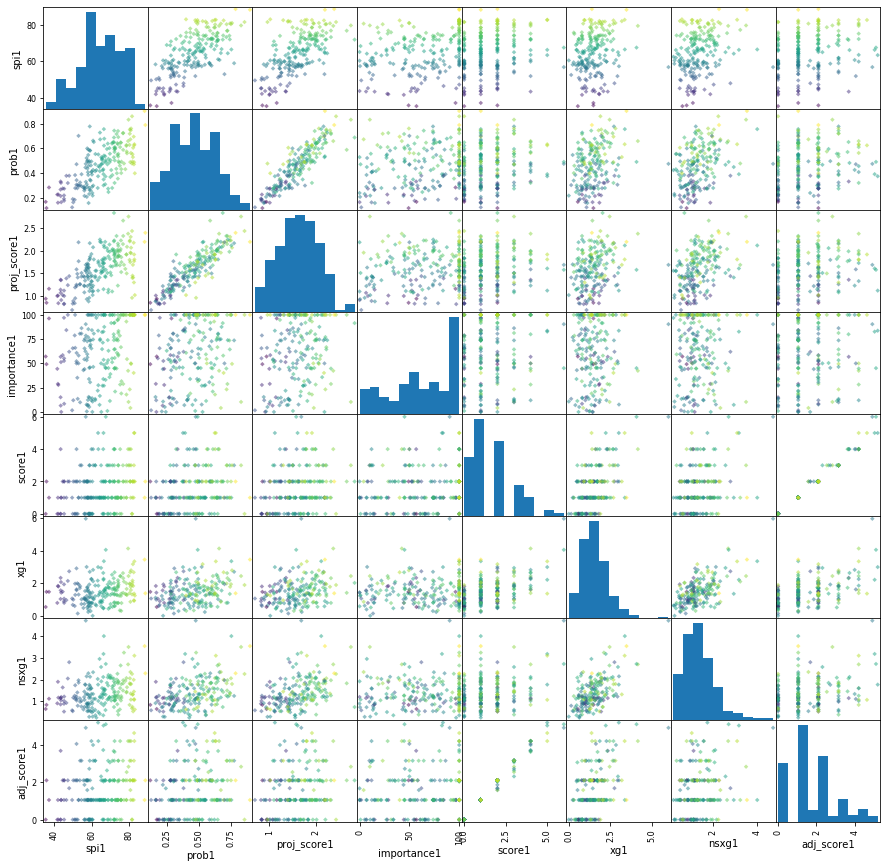

In [336]:
pd.plotting.scatter_matrix(team_a_df, c=team_a_df['spi1'], figsize = [15,15],s=10, marker = 'D');

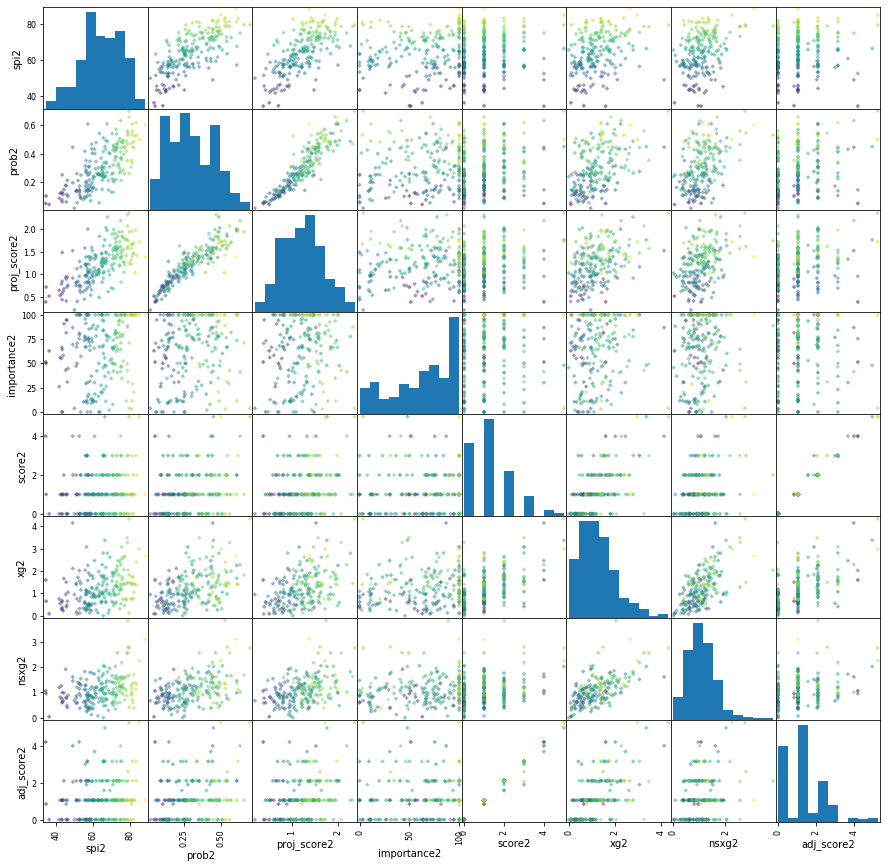

In [337]:
pd.plotting.scatter_matrix(team_b_df, c=team_b_df['spi2'], figsize = [15,15],s=10, marker = 'D');

<h5> Plotting a scatter graph against each other in the team_a dataFrame </h5>

Lets createt a heatmap for individual dataFrame, so we can compare this heatMap with entire dataFrame

In [338]:
def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 15
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
    plt.show()
    fig.savefig('corr.png')

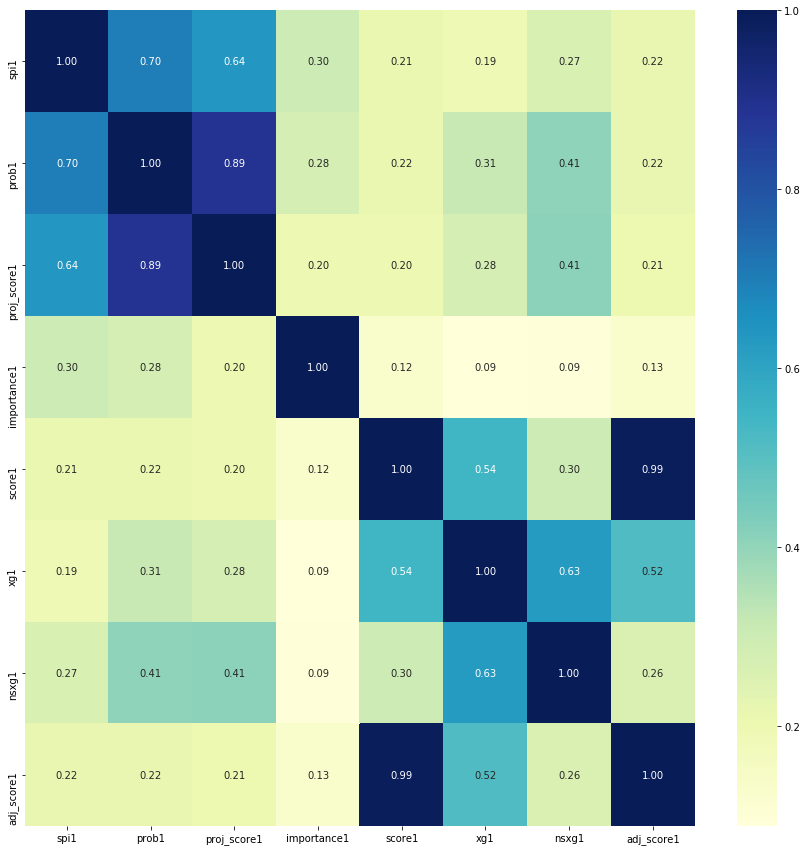

In [339]:
plot_correlation(team_a_df)

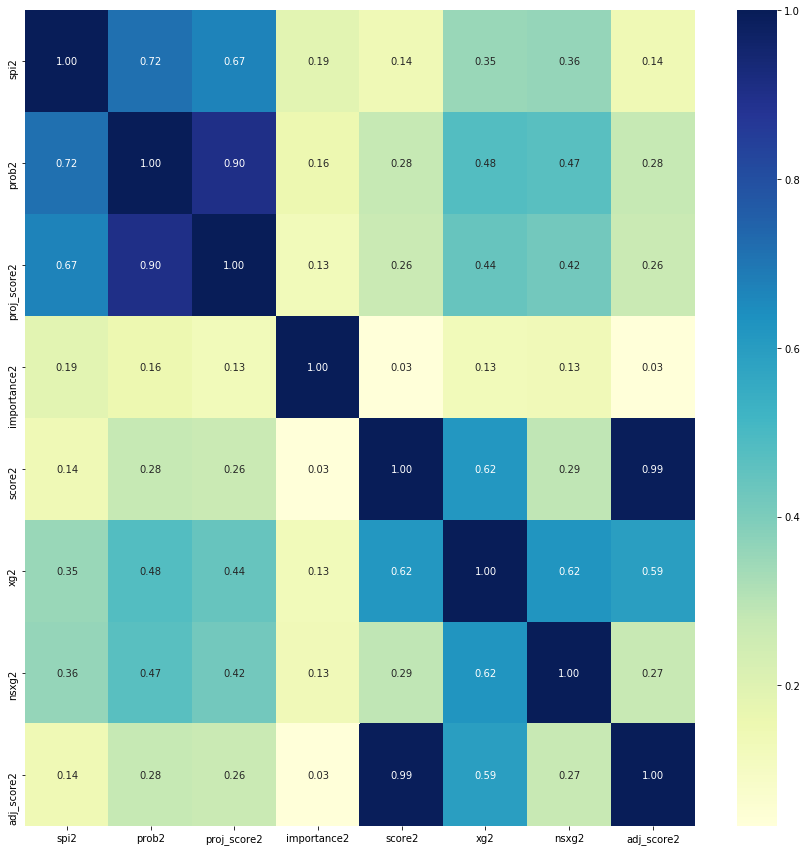

In [340]:
plot_correlation(team_b_df)

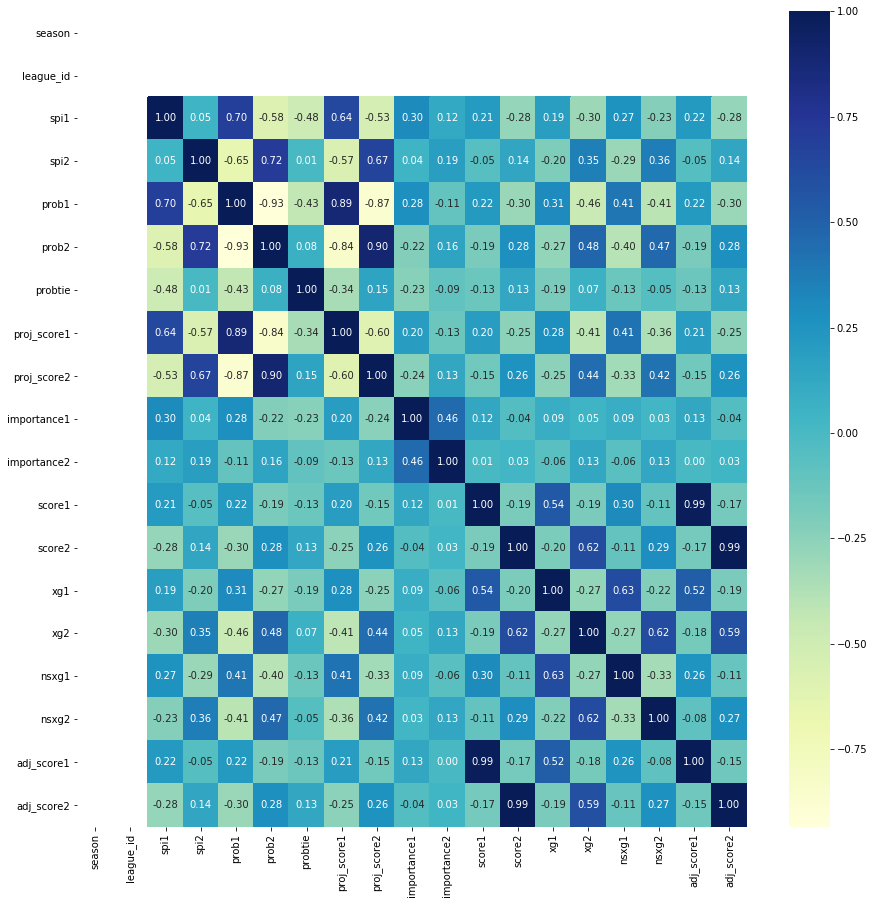

In [341]:
plot_correlation(europa_league)

Looking the heatmap in dfferent dataframe we can easily say, own score is more associated with own data. If we look score1 it is correlated to spi1 more closely than spi2. It also shows how correlatioin is distrubuted in the data. Score1 is +vly correlated to SPI1 while -vely with SPI2. 

<h4 style = "color : cyan;">FEATUE SELECTION</h4>

From above heatmap there are few features lying there position almost around 0- correlation. Lets remove them so that a overfitting can be avoided upto some extend. So I decided to drop, importance2, importance1,proj_score1,proj_score2. score1 and score2 will be feature columns. Lets remove league_id and season too. They are important if we want to predict score in particular season and particular league. But I already started working in a single league UEFA Chap League. 

In [342]:
feature_columns = ['spi1','spi2','prob1','prob2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2',"score1","score2"]
test_train_df = europa_league.filter(items=feature_columns)
test_train_df.head(10)

,spi1,spi2,prob1,prob2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2,score1,score2
336,49.91,78.70,0.1889,0.5438,0.68,1.49,0.55,2.79,0.00,2.59,0.0,3.0
337,60.08,67.00,0.3878,0.3417,1.15,1.17,0.50,0.69,1.05,1.05,1.0,1.0
338,57.60,53.42,0.4944,0.2500,0.53,1.15,0.55,1.28,1.58,0.00,2.0,0.0
339,58.93,34.49,0.7775,0.0519,2.71,1.60,1.25,1.06,3.15,4.20,3.0,4.0
340,65.44,57.83,0.5066,0.2165,1.43,0.42,1.34,0.89,1.05,0.00,1.0,0.0
341,66.21,71.64,0.3907,0.3555,2.22,1.89,3.18,1.55,5.03,0.00,5.0,0.0
342,64.45,43.37,0.6727,0.1265,0.91,0.27,1.18,0.99,1.05,0.00,1.0,0.0
343,45.27,70.19,0.2187,0.5402,1.94,1.94,0.53,1.66,2.10,1.05,2.0,1.0
344,73.54,55.77,0.6423,0.1384,1.28,0.35,0.87,0.62,1.05,0.00,1.0,0.0
345,74.08,64.95,0.5549,0.2141,0.80,1.73,0.39,1.35,3.15,2.10,3.0,2.0


<h4 style = "color : cyan;">SEPARATING TEST/TRAIN DATA</h4>
<p>Now lets separate test/train data using from  data frame. We are planning to predict the final scores of each team using some regression algorithm.It means there are two target columns. We have to predict both of them. To predict two targets we have to define regression model accordingly. </p>

In [343]:
#Separating target column at first 
feature_columns = ['spi1','spi2','prob1','prob2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']
target_columns=['score1','score2']

# Retaining required columns in each DF 
x_europa_df = test_train_df[feature_columns]
y_europa_df = test_train_df[target_columns]

x_train,x_test,y_train,y_test=train_test_split(x_europa_df,y_europa_df,train_size=0.7,test_size=0.3,random_state=123)

In [344]:
x_train.head(10)

,spi1,spi2,prob1,prob2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
344,73.54,55.77,0.6423,0.1384,1.28,0.35,0.87,0.62,1.05,0.00
1214,49.57,79.35,0.1220,0.6562,1.07,1.82,0.59,1.68,1.05,1.05
667,80.85,51.43,0.7609,0.0565,2.80,0.08,1.80,0.58,3.15,0.00
1211,72.10,78.29,0.3199,0.4673,2.68,1.44,1.26,1.62,4.20,1.05
1285,76.64,72.24,0.5881,0.2193,1.42,1.34,1.83,0.91,2.10,2.10
787,58.51,57.05,0.4850,0.2510,1.50,0.49,1.16,0.28,0.00,0.00
455,66.62,45.87,0.6784,0.1142,1.56,0.47,1.52,0.48,2.10,0.00
556,59.00,45.51,0.5827,0.1752,1.41,1.50,1.55,0.80,0.00,0.84
447,59.37,81.76,0.2595,0.4820,0.57,0.76,1.17,0.39,0.00,0.00
349,71.90,43.17,0.7435,0.0772,1.35,0.68,1.40,0.75,3.15,1.05


In [345]:
x_train.shape

(137, 10)

In [346]:
y_train.head(10)

,score1,score2
344,1.0,0.0
1214,1.0,1.0
667,3.0,0.0
1211,4.0,1.0
1285,2.0,2.0
787,0.0,0.0
455,2.0,0.0
556,0.0,1.0
447,0.0,0.0
349,3.0,1.0


In [347]:
y_train.shape

(137, 2)

<h4 style = "color : cyan;">USING LINEAR REGRESSION</h4>

Lets create a liner regression model, which predict the values of score1 and score2 using the feature variables. I want to merge the o/p with expected oputput so that later a comparison would be easy so I renamed the predicted score columns as 'score1_pred' and 'score2_pred'

The output of Linear Regression is in the form of numpy array which is converted to dataFrame to produce more elegant visualization.

In [348]:
model = LinearRegression()
# fit model
model.fit(x_train, y_train)
# make a prediction
y_pred = model.predict(x_test)
# summarize prediction
pred_df = pd.DataFrame(data=y_pred, columns=["score1_pred", "score2_pred"])
pred_df.head(10)

,score1_pred,score2_pred
0,-0.133611,1.130564
1,0.938290,1.049794
2,-0.045597,0.021364
3,1.014335,0.972848
4,3.710892,-0.007560
5,1.046008,0.976186
6,0.996591,1.003771
7,2.176873,1.993057
8,1.034214,-0.007117
9,2.019158,5.233931


In [360]:
y_test = y_test.reset_index(drop=True)
y_test.head(10)

,score1,score2
0,0.0,1.0
1,1.0,1.0
2,0.0,0.0
3,1.0,1.0
4,4.0,0.0
5,1.0,1.0
6,1.0,1.0
7,2.0,2.0
8,1.0,0.0
9,2.0,5.0


<h4 style = "color : cyan;">ANALYSING LINEAR REGRESSION OUTPUT</h4>

Lets merge output and expected output. Since there is no common column and we want result in the same line, I merged them in the order of index itself

In [362]:
# mergedDf = pred_df.merge(y_test, left_index=True, right_index=True)
# mergedDf.head(10)

mergedDf = pd.concat([pred_df, y_test], axis=1, sort=False)
mergedDf.head(10)

,score1_pred,score2_pred,score1,score2
0,-0.133611,1.130564,0.0,1.0
1,0.938290,1.049794,1.0,1.0
2,-0.045597,0.021364,0.0,0.0
3,1.014335,0.972848,1.0,1.0
4,3.710892,-0.007560,4.0,0.0
5,1.046008,0.976186,1.0,1.0
6,0.996591,1.003771,1.0,1.0
7,2.176873,1.993057,2.0,2.0
8,1.034214,-0.007117,1.0,0.0
9,2.019158,5.233931,2.0,5.0


Looking into the final output we can see, predicted score is matching with expected score in many lines but predicted score is to be rounded off to nearnest integer

<h5 style = "color : cyan;">CONVERTING REGRESSIN O/P TO NEAREST WHOLE NUMBER FOR GOAL</h4>

In [363]:
def custom_round(data):
    decimal = data - int(data)
    if(data<0):
        return 0
    if(decimal<0.5):
        return int(data)
    if(decimal >= 0.5):
        return int(data)+1

In [364]:
mergedDf['score1_pred']= mergedDf['score1_pred'].apply(custom_round)
mergedDf['score2_pred']= mergedDf['score2_pred'].apply(custom_round)
mergedDf['score1']= mergedDf['score1'].apply(custom_round)
mergedDf['score2']= mergedDf['score2'].apply(custom_round)
mergedDf.head(10)

,score1_pred,score2_pred,score1,score2
0,0,1,0,1
1,1,1,1,1
2,0,0,0,0
3,1,1,1,1
4,4,0,4,0
5,1,1,1,1
6,1,1,1,1
7,2,2,2,2
8,1,0,1,0
9,2,5,2,5


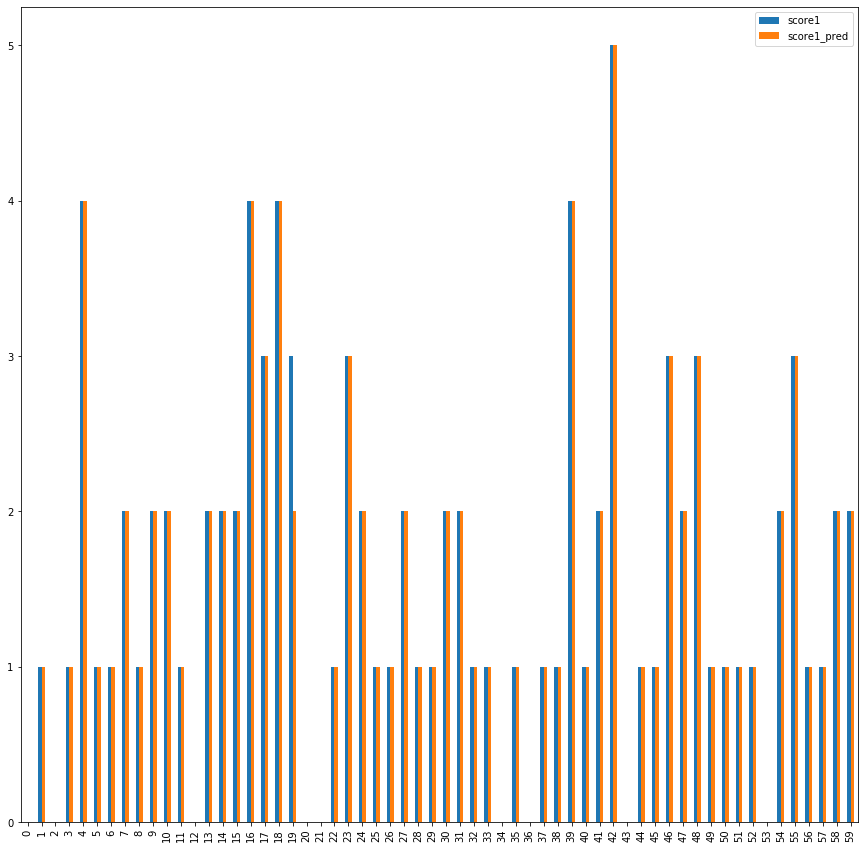

In [365]:
plotter_1 = mergedDf.filter(items =['score1','score1_pred'])
plotter_1.plot.bar();

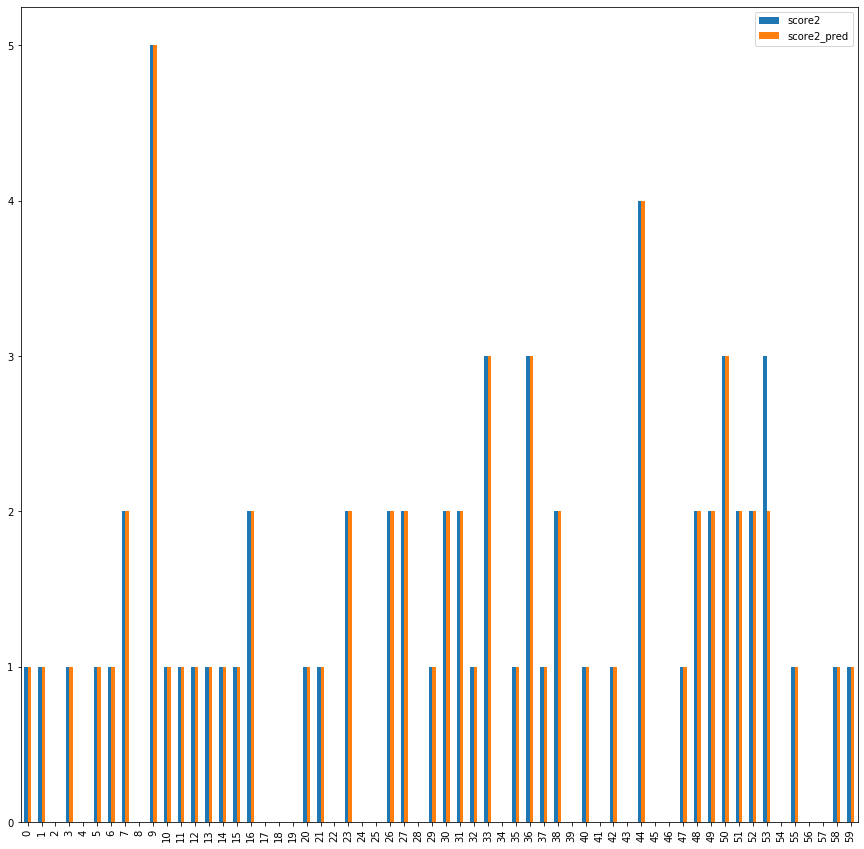

In [366]:
plotter_1 = mergedDf.filter(items =['score2','score2_pred'])
plotter_1.plot.bar();

Out of 59 predicted scores 1 in each of the score line is not matching. We can calculate this value using DF calculators itself but I have infered it from the Bar chat itself as the data taken is very small

<h5 style = "color : cyan;">CREATAE A ACCURACY CALCULATOR </h4>

In [367]:
inaccuracy_one = round(mergedDf[mergedDf.score1 != mergedDf.score1_pred].shape[0]/mergedDf.shape[0],2)*100
print("Accuracy % in score1 prediction is  :: " + str(100 - inaccuracy_one))

Accuracy % in score1 prediction is  :: 98.0


In [368]:
inaccuracy_two = round(mergedDf[mergedDf.score2 != mergedDf.score2_pred].shape[0]/mergedDf.shape[0],2)*100
print("Accuracy % in score2 prediction is  :: " + str(100 - inaccuracy_two))

Accuracy % in score2 prediction is  :: 98.0


<h5 style = "color : cyan;"> EXTENDING MODEL FOR LARGE DATA SET</h4>

<h4 style = "color : tomato"> The code in the following cell is a combinations of all the steps we have done so far. It takes a dataFrame as an input and produce the accuracy output. During this process, feature selection, model fitting, score_prediction and accuracy calculation are done </h4>

In [375]:
def linear_regression(test_train_df):
    #Separating target column at first 
    feature_columns = ['spi1','spi2','prob1','prob2','xg1','xg2','nsxg1','nsxg2','adj_score1','adj_score2']
    target_columns=['score1','score2']

    # Retaining required columns in each DF 
    x_df = test_train_df[feature_columns]
    y_df = test_train_df[target_columns]

    x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,train_size=0.7,test_size=0.3,random_state=123)
    model = LinearRegression()
    # fit model
    model.fit(x_train, y_train)
    # make a prediction
    y_pred = model.predict(x_test)
    # summarize prediction
    pred_df = pd.DataFrame(data=y_pred, columns=["score1_pred", "score2_pred"])
    y_test = y_test.reset_index(drop=True)
    mergedDf = pd.concat([pred_df, y_test], axis=1, sort=False)
    mergedDf['score1_pred']= mergedDf['score1_pred'].apply(custom_round)
    mergedDf['score2_pred']= mergedDf['score2_pred'].apply(custom_round)
    mergedDf['score1']= mergedDf['score1'].apply(custom_round)
    mergedDf['score2']= mergedDf['score2'].apply(custom_round)
    inaccuracy_one = round(mergedDf[mergedDf.score1 != mergedDf.score1_pred].shape[0]/mergedDf.shape[0],2)*100
    print("Accuracy % in score1 prediction is  :: " + str(100 - inaccuracy_one))
    inaccuracy_two = round(mergedDf[mergedDf.score2 != mergedDf.score2_pred].shape[0]/mergedDf.shape[0],2)*100
    print("Accuracy % in score2 prediction is  :: " + str(100 - inaccuracy_two))
#     return mergedDf

<h3>PREDICT FOR SOME OTHER LEAGUE </h3>

<h5 style = "color : cyan;">BUNDESLIGA</h4>

In [379]:
bundesliga = soccer_df[soccer_df.league=="German Bundesliga"]
budesliga.describe()

,season,league_id,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
count,306.0,306.0,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,306.000000,36.000000,36.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2020.0,1845.0,70.280098,70.306307,0.438175,0.324290,0.237541,1.579444,1.297582,42.113889,40.483333,2.037037,1.370370,1.843704,1.326667,1.585556,1.102593,2.066296,1.366667
std,0.0,0.0,10.074275,10.076153,0.180731,0.168717,0.046379,0.502406,0.500670,15.254922,14.649554,1.742710,1.418237,1.117673,0.815211,0.801054,0.555723,1.727161,1.375612
min,2020.0,1845.0,56.750000,56.750000,0.056300,0.016700,0.069800,0.660000,0.310000,23.200000,20.300000,0.000000,0.000000,0.170000,0.160000,0.430000,0.060000,0.000000,0.000000
25%,2020.0,1845.0,63.370000,63.370000,0.316300,0.213500,0.226325,1.260000,0.980000,28.800000,29.950000,1.000000,0.000000,1.055000,0.705000,1.030000,0.735000,1.050000,0.000000
50%,2020.0,1845.0,66.880000,66.325000,0.426200,0.303350,0.250900,1.480000,1.205000,37.450000,35.850000,1.000000,1.000000,1.620000,1.310000,1.250000,1.020000,1.050000,1.050000
75%,2020.0,1845.0,77.570000,77.570000,0.549700,0.420900,0.268400,1.805000,1.527500,54.950000,50.000000,3.000000,3.000000,2.450000,1.815000,2.130000,1.510000,3.060000,3.150000
max,2020.0,1845.0,94.660000,95.320000,0.911100,0.824800,0.302400,3.590000,3.220000,75.700000,73.800000,8.000000,4.000000,4.580000,3.140000,3.290000,2.320000,8.090000,3.700000


In [380]:
bundesliga = budesliga.dropna()
linear_regression(bundesliga)

Accuracy % in score1 prediction is  :: 100.0
Accuracy % in score2 prediction is  :: 100.0


<h5 style = "color : cyan;">CHINESE SUPER LEAGUE</h4>

In [384]:
chinese_super_league = soccer_df[soccer_df.league=="Chinese Super League"]
chinese_super_league = chinese_super_league.dropna()
linear_regression(chinese_super_league)

Accuracy % in score1 prediction is  :: 96.0
Accuracy % in score2 prediction is  :: 100.0


<h3 style='color:tomato'> From all above code and discussion an engine predicting scores and accuracy is created. The accuracy is decreasing as increase in the data size. THe prediction is working great for for league but mixing all league is data is not working correctly. It means we have to pass categorail data too for the prediction. </h3>